# Building Energy Analysis - CRISP-DM Framework

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np
    

## Step 1: Load the dataset

In [2]:

# Load the dataset
file_path = './data/ENB2012_data.xlsx'
data = pd.read_excel(file_path)

# Display basic information about the dataset
data.info()
data.head()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Step 2: Statistical summaries and correlation matrix

In [3]:

# Statistical summaries for all features and target variables
stat_summary = data.describe()
correlation_matrix = data.corr()

# Display statistical summary
print(stat_summary)

# Display correlation matrix
print(correlation_matrix)
    

               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307195   24.587760  
std      0.133221    1.55096   10.090204    9.513306  
min      0.000000    0.00000    6.010000   10.900000  
25% 

## Step 3: Detect potential outliers using boxplots

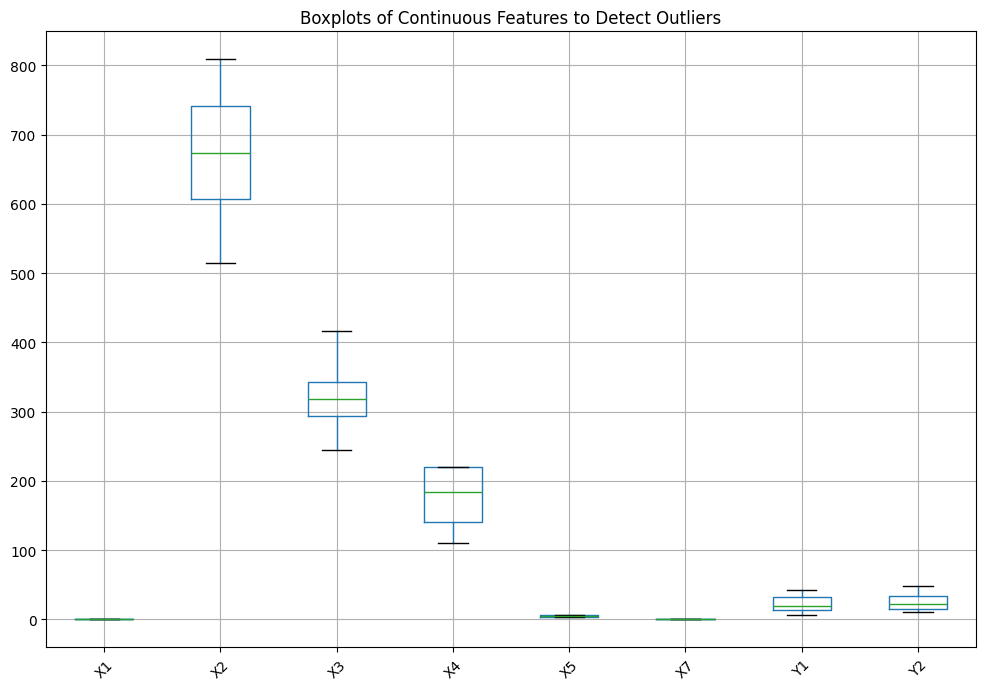

In [4]:

# Boxplots for continuous features to detect potential outliers
continuous_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X7', 'Y1', 'Y2']
plt.figure(figsize=(12, 8))
data[continuous_features].boxplot()
plt.title("Boxplots of Continuous Features to Detect Outliers")
plt.xticks(rotation=45)
plt.show()
    

## Step 4: Scaling continuous features and splitting data

In [5]:

# Scaling the continuous features
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[continuous_features] = scaler.fit_transform(data[continuous_features])

# Split the dataset into training and test sets (80/20 split)
X = data_scaled.drop(columns=['Y1', 'Y2'])
y = data_scaled[['Y1', 'Y2']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape
    

((614, 8), (154, 8), (614, 2), (154, 2))

## Step 5: Model selection and evaluation

In [6]:

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return {'RMSE': rmse, 'MAE': mae, 'R²': r2}

# Evaluate each model for both targets (Y1 and Y2)
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Display results
results_df = pd.DataFrame(results).T
print(results_df)
    

                       RMSE       MAE        R²
Linear Regression  0.315760  0.224176  0.902527
Decision Tree      0.151889  0.087074  0.969305
Random Forest      0.123629  0.078077  0.979649


d:\Education\Masters\Sem_1\CMPE-255-Data-Mining\Assignments\Python-Colab-CoPilot-Akkio\Assignment-2\backend\.venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Education\Masters\Sem_1\CMPE-255-Data-Mining\Assignments\Python-Colab-CoPilot-Akkio\Assignment-2\backend\.venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\Education\Masters\Sem_1\CMPE-255-Data-Mining\Assignments\Python-Colab-CoPilot-Akkio\Assignment-2\backend\.venv\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use 

## Step 6: Residual analysis for Random Forest model

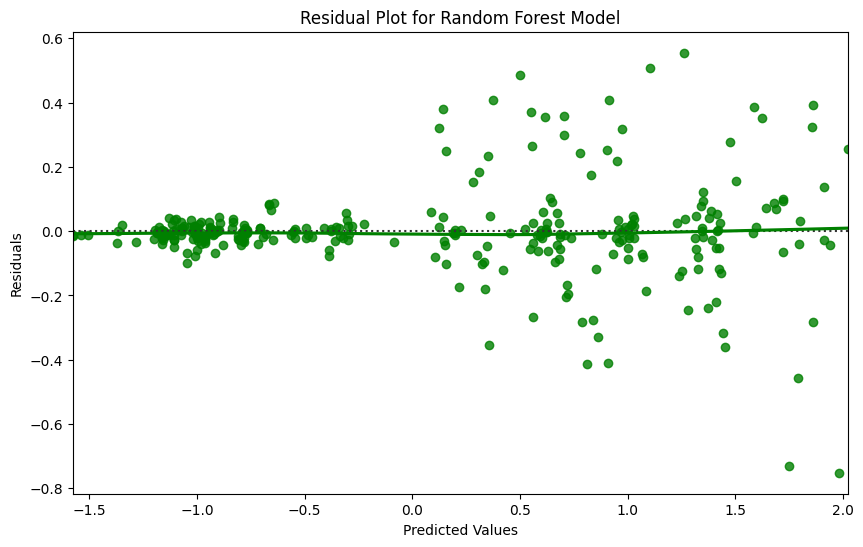

In [8]:

# Residual analysis for Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred.flatten(), y=residuals.values.flatten(), lowess=True, color="g")
plt.title("Residual Plot for Random Forest Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()
    

## Step 7: Cross-validation

In [8]:

# Perform 5-fold cross-validation and calculate the average RMSE
cv_rmse = -cross_val_score(rf_model, X, y, cv=5, scoring='neg_root_mean_squared_error').mean()
print(f"5-Fold CV RMSE: {cv_rmse}")
    

5-Fold CV RMSE: 0.1703922362125256
